# Uploading the File
First we upload the zip file and later we unzip the file 

source: https://www.kaggle.com/datasets/otahharrison/ml-image-classification

**(Note: Few of the code snippets used in this notebook is taken from Professor’s notebooks on github
repo)**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ML_image_classification.zip to ML_image_classification.zip


In [2]:
!unzip ML_image_classification.zip

Archive:  ML_image_classification.zip
  inflating: DATA_IMAGE/Test/CAR/1.jpg  
  inflating: DATA_IMAGE/Test/CAR/10.jpg  
  inflating: DATA_IMAGE/Test/CAR/100.jpg  
  inflating: DATA_IMAGE/Test/CAR/11.jpg  
  inflating: DATA_IMAGE/Test/CAR/12.jpg  
  inflating: DATA_IMAGE/Test/CAR/13.jpg  
  inflating: DATA_IMAGE/Test/CAR/14.jpg  
  inflating: DATA_IMAGE/Test/CAR/15.jpg  
  inflating: DATA_IMAGE/Test/CAR/16.jpg  
  inflating: DATA_IMAGE/Test/CAR/17.jpg  
  inflating: DATA_IMAGE/Test/CAR/18.jpg  
  inflating: DATA_IMAGE/Test/CAR/19.jpg  
  inflating: DATA_IMAGE/Test/CAR/2.jpg  
  inflating: DATA_IMAGE/Test/CAR/20.jpg  
  inflating: DATA_IMAGE/Test/CAR/21.jpg  
  inflating: DATA_IMAGE/Test/CAR/22.jpg  
  inflating: DATA_IMAGE/Test/CAR/23.jpg  
  inflating: DATA_IMAGE/Test/CAR/24.jpg  
  inflating: DATA_IMAGE/Test/CAR/25.jpg  
  inflating: DATA_IMAGE/Test/CAR/26.jpg  
  inflating: DATA_IMAGE/Test/CAR/27.jpg  
  inflating: DATA_IMAGE/Test/CAR/28.jpg  
  inflating: DATA_IMAGE/Test/CAR/29.jpg

# Dividing Into Test/Train
The dataset already was divided so we aren't dividing the dataset into test/train

# Exploring the Images
First we would like to see what the images look like. So we would store 4 images from every directory inside test and train

In [10]:
import os
test_path = './DATA_IMAGE/Test'
train_path = './DATA_IMAGE/Train'
test_dir = os.listdir(test_path)
train_dir = os.listdir(train_path)
labels = test_dir

image_show = []   # contains the directory to show images

# get 4 images from every directory inside test directory and train directoy
# and add to image_show list
def get_images(test_or_train_dir, test_or_train_path):
  for index, dir in enumerate(test_or_train_dir):
    image_show_dir = f"{test_or_train_path}/{dir}"
    image_inside_dir = os.listdir(image_show_dir)

    for i in range(0,4):
      image_show.append(image_show_dir + '/'+image_inside_dir[i])

get_images(test_dir, test_path)
get_images(train_dir, train_path)

image_show
  



['./DATA_IMAGE/Test/TREE/38.jpg',
 './DATA_IMAGE/Test/TREE/77.jpeg',
 './DATA_IMAGE/Test/TREE/91.jpg',
 './DATA_IMAGE/Test/TREE/58.jpg',
 './DATA_IMAGE/Test/CAR/38.jpg',
 './DATA_IMAGE/Test/CAR/91.jpg',
 './DATA_IMAGE/Test/CAR/3.jpg',
 './DATA_IMAGE/Test/CAR/58.jpg',
 './DATA_IMAGE/Train/TREE/151.jpg',
 './DATA_IMAGE/Train/TREE/180.jpg',
 './DATA_IMAGE/Train/TREE/166.jpg',
 './DATA_IMAGE/Train/TREE/3.jpg',
 './DATA_IMAGE/Train/CARS/151.jpg',
 './DATA_IMAGE/Train/CARS/180.jpg',
 './DATA_IMAGE/Train/CARS/166.jpg',
 './DATA_IMAGE/Train/CARS/105.jpg']

#### Displaying the Images

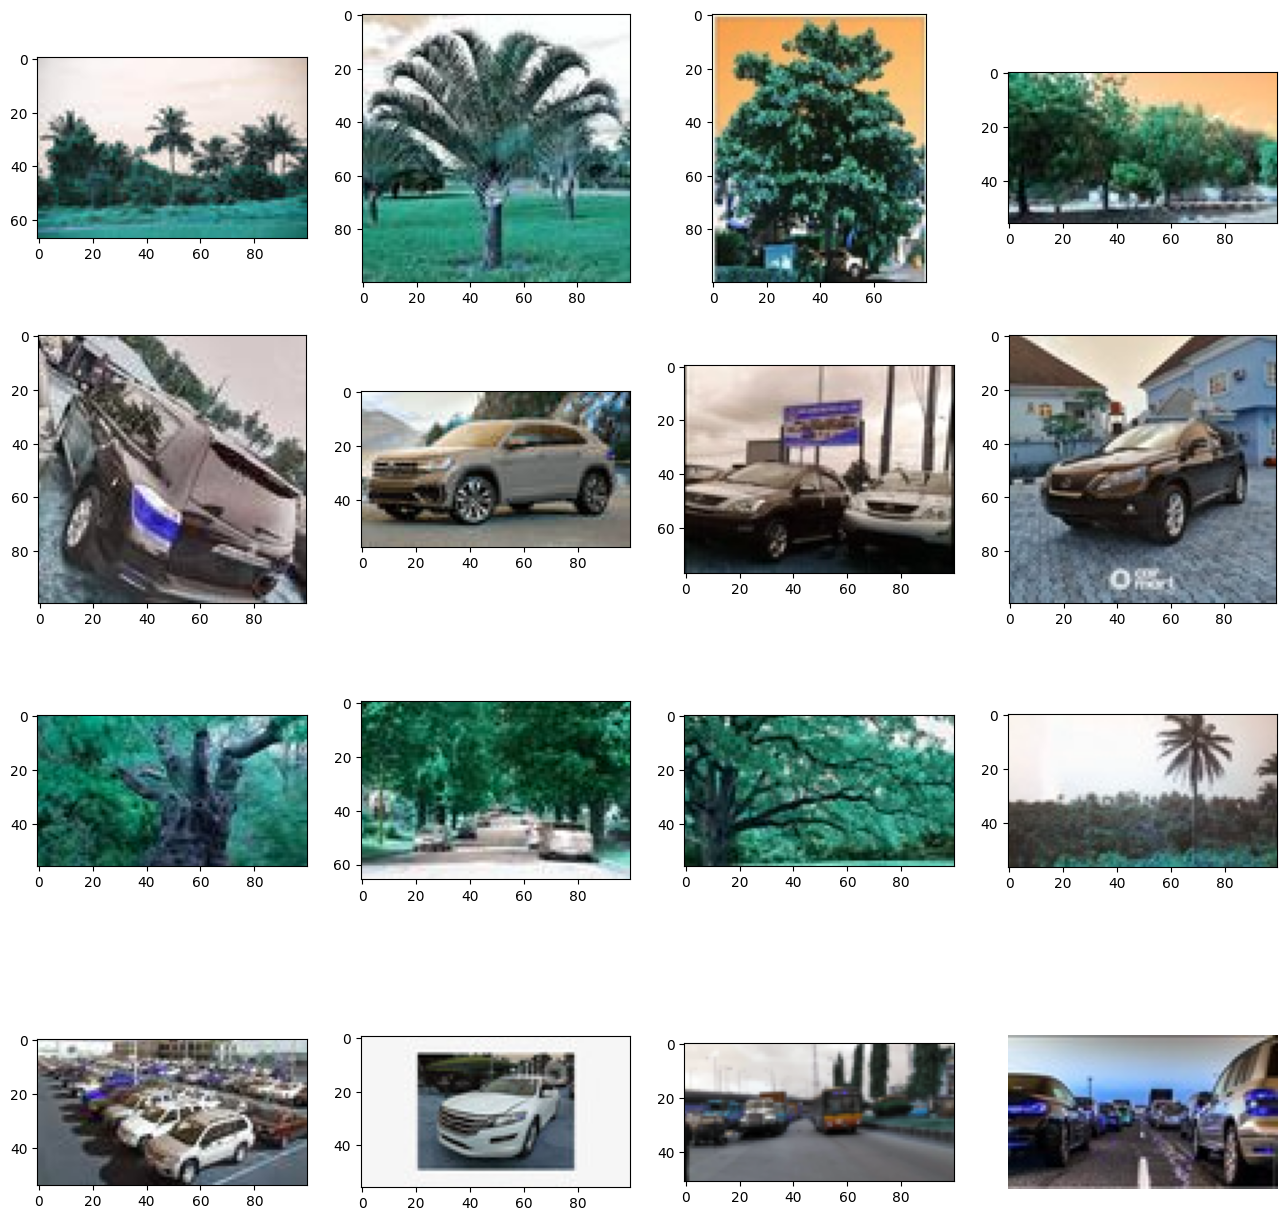

In [20]:
import matplotlib.pyplot as plt
import cv2 as cv

figure, axes = plt.subplots(4,4,figsize=(16,16))

for row in range (4):
  for col in range (4):
    index = row + 4 * col
    image_path = image_show[index]
    image = cv.imread(image_path)
    axes[col,row].imshow(image)
    plt.axis('off')

Here in this plot, the first row contains 4 sample of car images from test data. Second row shows 4 sample of tree images from test data. Thir row shows 4 sample of car images from train data. Fourth row shows 4 sample of tree images from train data. We can also see that the images displayed on this plot is of different sizes, so we have to resize the image before we can train and test the model.

#Distribution

(array([100., 100.]), array([0., 1., 2.]), <BarContainer object of 2 artists>)

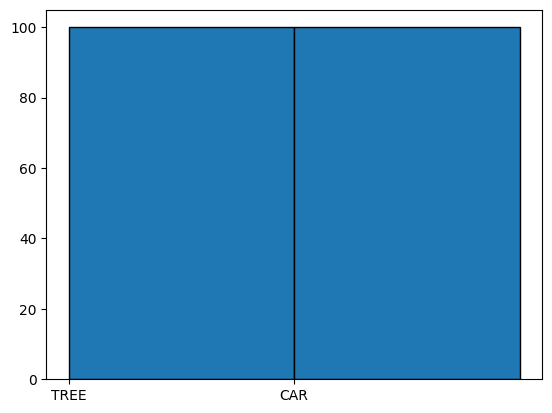

In [31]:
dist = []

for label in labels:
  target_path = test_path + '/' + y
  inside_target_path = os.listdir(target_path)
  dist += [f'{label}'] * len(inside_target_path)

plt.hist(dist, bins=range(len(labels)+1), ec="k")


As we can see the target classes are Tree and Car and they are equally distributed. The model would predict idf the image is Tree or Car

# Loading Train and Test Data

In [ ]:
IMG_SIZE = (50,50)
BATCH_SIZE = 20

In [ ]:
import tensorflow as tf

train_data = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode = 'categorical', 
    color_mode = 'grayscale',
    batch_size = BATCH_SIZE,
    image_size = IMG_SIZE
)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_path,
    labels='inferred',
    label_mode = 'categorical', 
    color_mode = 'grayscale',
    batch_size = BATCH_SIZE,
    image_size = IMG_SIZE
)

train_data_rgb = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode = 'categorical', 
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    image_size = IMG_SIZE
)

test_data_rgb = tf.keras.utils.image_dataset_from_directory(
    test_path,
    labels='inferred',
    label_mode = 'categorical', 
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    image_size = IMG_SIZE
)

Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


Here we have 4 types of dataset. train_data and test_data contains the images that are stored as grayscale. This data is used for sequential and CNN models. Then we have train_data_rgb and test_data_rgb which are used for Pretrained Model and Transfer Learning in Google's MobileNetV2 model.

# Sequential Model
In this secton we will be creating a sequential model using our train_data that we loaded in the previous section and test it using test_data

First we create the model:

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=IMG_SIZE),
  tf.keras.layers.Dense(350, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(350, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation='softmax'),
])

Then we compile the model with loss, optimizer and metrics argument

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Then we fit the model with training data and perform tests on it

In [ ]:
history = model.fit(x=train_data,
                    epochs=10,
                    verbose=1,
                    validation_data=test_data)

Epoch 1/10
10/10 [==============================] - 3s 89ms/step - loss: 824.9829 - accuracy: 0.4750 - val_loss: 377.9778 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 1s 49ms/step - loss: 169.3825 - accuracy: 0.4700 - val_loss: 119.7350 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 1s 43ms/step - loss: 80.1783 - accuracy: 0.5050 - val_loss: 21.9016 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 1s 59ms/step - loss: 51.8897 - accuracy: 0.5050 - val_loss: 51.1312 - val_accuracy: 0.5000
Epoch 5/10
10/10 [==============================] - 0s 38ms/step - loss: 42.1113 - accuracy: 0.5350 - val_loss: 31.0430 - val_accuracy: 0.5000
Epoch 6/10
10/10 [==============================] - 1s 47ms/step - loss: 20.9212 - accuracy: 0.5150 - val_loss: 12.2933 - val_accuracy: 0.5050
Epoch 7/10
10/10 [==============================] - 1s 72ms/step - loss: 7.5751 - accuracy: 0.5350 - val_loss: 0.7088 - val_accuracy: 0.66

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

We can display the Accuracy of training and testing data as a graph

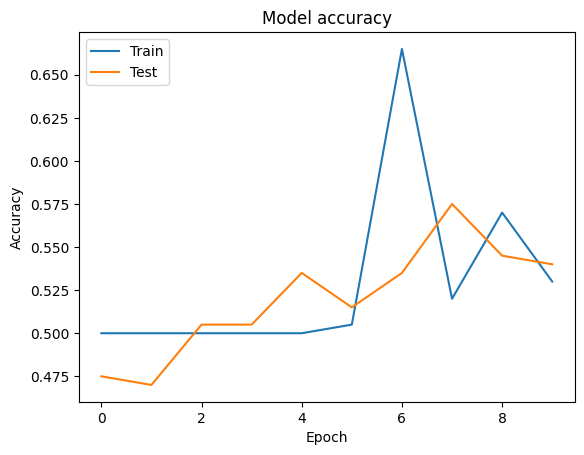

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


As we can see that the highest training accuract was 57.5% and highest testing accuracy was 65%

# CNN
In this secton we will be creating a sequential model using our train_data that we loaded in the previous section and test it using test_data

First we create the model:

In [ ]:
model = tf.keras.models.Sequential(
    [
        tf.keras.Input(shape=(50, 50, 1)),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(2, activation="softmax"),
    ]
)

let take a look at the summary of the model

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 7744)              0         
                                                                 
 dropout_9 (Dropout)         (None, 7744)             

we compile the model with loss, optimizer and metrics argument and then we we fit the model with training data and perform tests on it.

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_data,
                    epochs=30,
                    verbose=1,
                    validation_data=test_data)

Epoch 1/30
10/10 [==============================] - 3s 216ms/step - loss: 16.8179 - accuracy: 0.5050 - val_loss: 6.8577 - val_accuracy: 0.5050
Epoch 2/30
10/10 [==============================] - 2s 193ms/step - loss: 3.1828 - accuracy: 0.5450 - val_loss: 0.9770 - val_accuracy: 0.5900
Epoch 3/30
10/10 [==============================] - 1s 93ms/step - loss: 1.1117 - accuracy: 0.5800 - val_loss: 0.6486 - val_accuracy: 0.6750
Epoch 4/30
10/10 [==============================] - 1s 105ms/step - loss: 0.8684 - accuracy: 0.6100 - val_loss: 0.7321 - val_accuracy: 0.6150
Epoch 5/30
10/10 [==============================] - 1s 102ms/step - loss: 0.5582 - accuracy: 0.7300 - val_loss: 0.6196 - val_accuracy: 0.6750
Epoch 6/30
10/10 [==============================] - 1s 95ms/step - loss: 0.4793 - accuracy: 0.7300 - val_loss: 0.6597 - val_accuracy: 0.6350
Epoch 7/30
10/10 [==============================] - 1s 92ms/step - loss: 0.4009 - accuracy: 0.7900 - val_loss: 0.6515 - val_accuracy: 0.6300
Epoch 8/

We can display the Accuracy of training and testing data as a graph

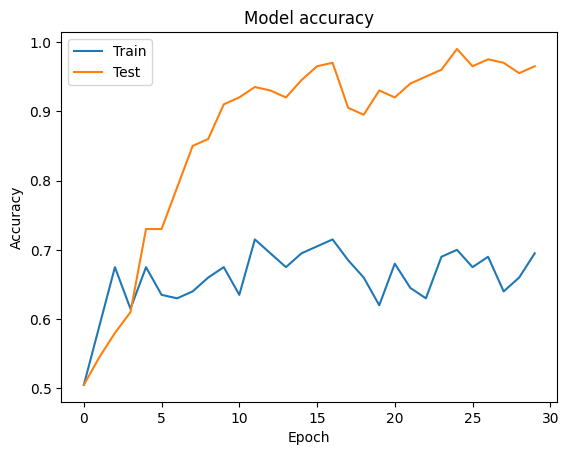

In [ ]:

# Plot training & validation accuracy values
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

As we can see that the highest training accuracy was 99% and highest testing accuracy was 71.50%. This is a significant increase from sequential model.

# Pretrained Model and Transfer Learning

**Note: Few of the code snippets used in this section is driectly taken from official website: https://www.tensorflow.org/tutorials/images/transfer_learning**  

In this section we will perform transfer learning on pretrained model. The pretrained model would be google's MobileNetV2

First we will like to use data augmentation because our dataset is small.

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])


Let see what data augmentation can do the images

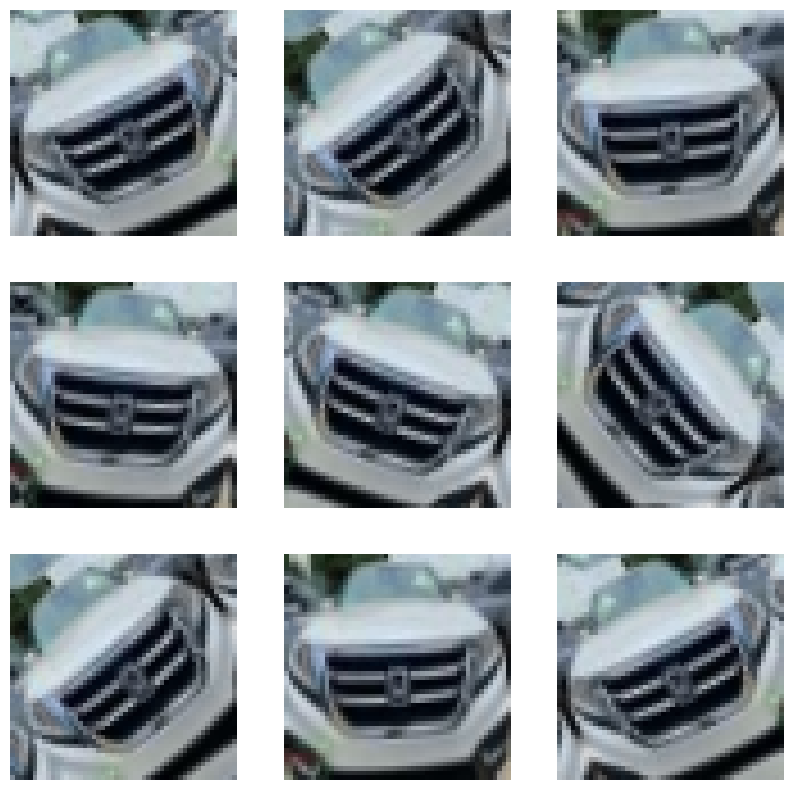

In [ ]:

for image, _ in train_data_rgb.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')


### Add classification head

Since we are going to use MobileNetV2 as the base model, we need the pixel values as [-1,1]. Currently the pixel values stored are between [0,255]. To rescale the pixel values we will use preprocess_input

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

Now we will create base model based on MobileNetV2 from google with weights=imagenet

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')


In [ ]:
image_batch, label_batch = next(iter(train_data_rgb))
feature_batch = base_model(image_batch)
print(feature_batch.shape)


(20, 2, 2, 1280)


We will be freezing the given layer so that it prevent the weight from updating during the training. This can be done by setting the  `layer.trainable = False` . Then we can see the summay of the model

In [ ]:
base_model.trainable = False
base_model.summary()


Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 25, 25, 32)   864         ['input_8[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 25, 25, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 25, 25, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

We will use `tf.keras.layers.GlobalAveragePooling2D` layer to convert the features to a single 1280-element vector per image.

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(20, 1280)


we create a prediction layer and set it 2 as we need to predict for 2 different classes (cars and trees )

In [ ]:
prediction_layer = tf.keras.layers.Dense(2) # this part was changed
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)


(20, 2)


Now we build the model by chaining data augmentation and rescalling and other feature extractor layers.

In [ ]:
inputs = tf.keras.Input(shape=(50, 50, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

Now we compile the model

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 sequential_6 (Sequential)   (None, 50, 50, 3)         0         
                                                                 
 tf.math.truediv_2 (TFOpLamb  (None, 50, 50, 3)        0         
 da)                                                             
                                                                 
 tf.math.subtract_2 (TFOpLam  (None, 50, 50, 3)        0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 2, 2, 1280)       2257984   
 ional)                                                          
                                                           

As we can see that there are 2.5 million total parameters and among them 2,562 parameters are trainable in the dense layer. These are divided between two `tf.Variable` objects, the weights and biases

In [ ]:
len(model.trainable_variables)


2

Now we can train the model with train_data_rgb and test it on test_data_rgb. 

In [ ]:
history = model.fit(train_data_rgb,
                    epochs=20,
                    validation_data=test_data_rgb)


Epoch 1/20
10/10 [==============================] - 12s 490ms/step - loss: 0.8589 - accuracy: 0.5850 - val_loss: 0.7904 - val_accuracy: 0.6450
Epoch 2/20
10/10 [==============================] - 2s 200ms/step - loss: 0.8555 - accuracy: 0.5700 - val_loss: 0.7487 - val_accuracy: 0.6600
Epoch 3/20
10/10 [==============================] - 2s 236ms/step - loss: 0.7462 - accuracy: 0.5900 - val_loss: 0.7119 - val_accuracy: 0.6950
Epoch 4/20
10/10 [==============================] - 2s 153ms/step - loss: 0.7445 - accuracy: 0.6250 - val_loss: 0.6836 - val_accuracy: 0.7050
Epoch 5/20
10/10 [==============================] - 1s 135ms/step - loss: 0.6883 - accuracy: 0.6650 - val_loss: 0.6557 - val_accuracy: 0.7250
Epoch 6/20
10/10 [==============================] - 1s 133ms/step - loss: 0.6823 - accuracy: 0.6750 - val_loss: 0.6329 - val_accuracy: 0.7450
Epoch 7/20
10/10 [==============================] - 1s 118ms/step - loss: 0.6628 - accuracy: 0.7050 - val_loss: 0.6129 - val_accuracy: 0.7750
Epoch

We can display the Accuracy of training and testing data as a graph

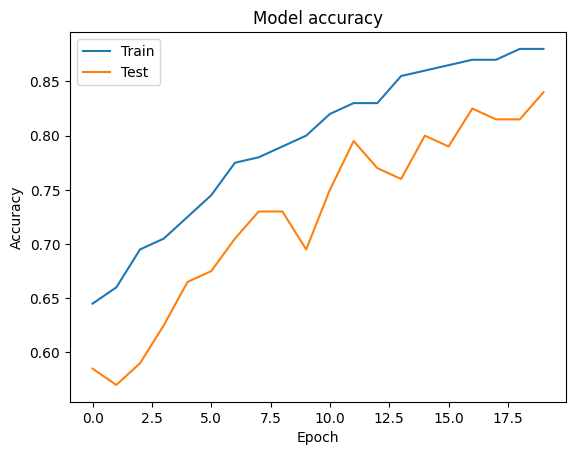

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

As we can see that the highest training accuracy was 84% and highest testing accuracy was 88%. This model is better than CNN and sequential model.

# Analysis
For Sequential model the final accuracies for training and testing after 10 epochs were 54% and 53% respectively. The accuracies were low for different epochs other than 10. For CNN model The final accuracies for training and testing after 30 epochs were 96% and 69.5% respectively. The accuracies were low for different epochs other than 30.For Pretrained Model and Transfer Learning the final accuracies for training and testing after 20 epochs were 84% and 88% respectively. It can be seen that with the increasing number of epochs the the accuracy was increasing. It might be that it could become more accurate for higher number of epochs

The CNN Mode gave the highest accuracies for training data which was 96% . Pretrained Model had the highest accuracy for testing data which was 88%.The worst model was the sequential model with 54% and 48.5% for training and testing respectively.

In [ ]:
!jupyter nbconvert --to html /content/Image_Classification_with_DL.ipynb

[NbConvertApp] Converting notebook /content/Image_Classification_with_DL.ipynb to html
[NbConvertApp] Writing 2613971 bytes to /content/Image_Classification_with_DL.html
